# Playing with UCI Bike Sharing Data

Links:
- [Data source](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)

In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from download_data import download_data

Download data from the source to the local `data` directory

In [ ]:
local_data_dir = download_data()

Import data

In [8]:
raw_data_path = local_data_dir / "day.csv"
lbl_date = "dteday"
lbl_count_of_rental_bikes = "cnt"
raw_data = pd.read_csv(raw_data_path, parse_dates=[lbl_date])
raw_data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [18]:
raw_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [20]:
raw_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
split_time = raw_data[lbl_date].max() - pd.DateOffset(days=30)
data_train = raw_data.pipe(lambda df: df[df[lbl_date] < split_time])
data_train.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
695,696,2012-11-26,4,1,11,0,1,1,1,0.313333,0.339004,0.535417,0.046650,337,4750,5087
696,697,2012-11-27,4,1,11,0,2,1,2,0.291667,0.281558,0.786667,0.237562,123,3836,3959
697,698,2012-11-28,4,1,11,0,3,1,1,0.296667,0.289762,0.506250,0.210821,198,5062,5260
698,699,2012-11-29,4,1,11,0,4,1,1,0.280870,0.298422,0.555652,0.115522,243,5080,5323
699,700,2012-11-30,4,1,11,0,5,1,1,0.298333,0.323867,0.649583,0.058471,362,5306,5668


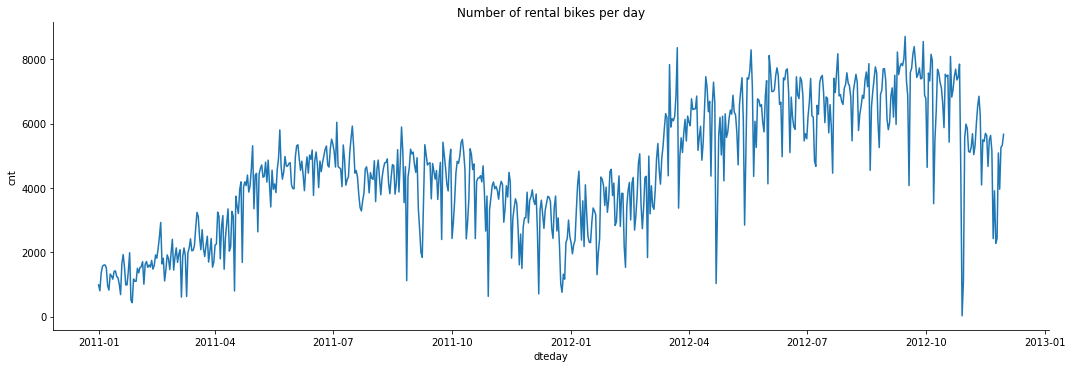

In [17]:
sns.relplot(
    x=lbl_date,
    y=lbl_count_of_rental_bikes,
    kind="line",
    aspect=3,
    data=data_train
)
plt.title("Number of rental bikes per day")
plt.show()

In [24]:
MAX_RENTALS_PER_BIKE_PER_DAY = 12
lbl_nr_of_bikes_needed_per_day = "number of bikes needed per day"
data_train = data_train.assign(
    **{lbl_nr_of_bikes_needed_per_day: lambda df: df[lbl_count_of_rental_bikes] / MAX_RENTALS_PER_BIKE_PER_DAY}
)

In [26]:
max_nr_of_bikes_needed = data_train[lbl_nr_of_bikes_needed_per_day].max()
print(f"Max number of bikes needed over all days in the data: {max_nr_of_bikes_needed:.0f}")

Max number of bikes needed over all days in the data: 726


In [33]:
alpha = 0.95
quantile_nr_of_bikes_needed = data_train[lbl_nr_of_bikes_needed_per_day].quantile(alpha)

print(f"{alpha:.0%} quantile number of bikes needed over all days in the data: {quantile_nr_of_bikes_needed:.0f}")

95% quantile number of bikes needed over all days in the data: 632


In [38]:
grid_bikes_available = np.linspace(start=0, stop=max_nr_of_bikes_needed, num=10)

In [50]:
def get_pct_days_covered(data: pd.DataFrame, bikes_available: int) -> float:
    return 100 * (data[lbl_nr_of_bikes_needed_per_day] <= bikes_available).sum() / data.shape[0]


lbl_pct_bikes_available = "pct bikes available"
lbl_days_covered = "pct days covered"
pct_days_covered = list()
for bikes_available in grid_bikes_available:
    pct_days_covered.append(
        {lbl_pct_bikes_available: 100 * bikes_available / max_nr_of_bikes_needed,
         lbl_days_covered: get_pct_days_covered(data=data_train, bikes_available=bikes_available)}
    )
pct_days_covered = pd.DataFrame(pct_days_covered)
pct_days_covered

,pct bikes available,pct days covered
0,0.000000,0.000000
1,11.111111,1.857143
2,22.222222,12.000000
3,33.333333,22.142857
4,44.444444,35.857143
5,55.555556,58.285714
6,66.666667,72.428571
7,77.777778,82.857143
8,88.888889,97.000000
9,100.000000,100.000000


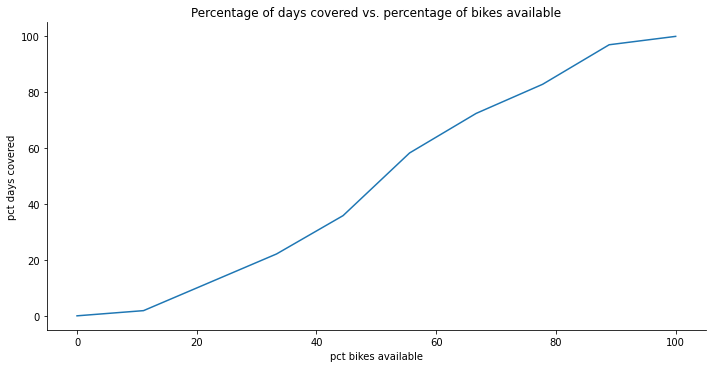

In [52]:
sns.relplot(
    x=lbl_pct_bikes_available,
    y=lbl_days_covered,
    kind="line",
    aspect=2,
    data=pct_days_covered,
)
plt.title("Percentage of days covered vs. percentage of bikes available")
plt.show()

## Model train/fit/score

In [145]:
%%time

lbl_prediction = "prediction"
lbl_holiday = "holiday"
lbl_weekday = "weekday"
lbl_workingday = "workingday"
lbl_weathersit = "weathersit"
lbl_season = "season"
lbl_temp = "temp"
lbl_hum = "hum"
lbl_windspeed = "windspeed"

continuous_features = [lbl_temp, lbl_hum, lbl_windspeed]
binary_features = [lbl_holiday, lbl_workingday]
categorical_features = [lbl_season, lbl_weathersit]

categorical_transformer = OneHotEncoder(sparse=False)
numeric_transformer = StandardScaler()
data_transformer = ColumnTransformer(
    transformers=[
        ("binary features", "passthrough", binary_features),
        ("categorical features", categorical_transformer, categorical_features)
    ], remainder="drop"
)
model = RandomForestRegressor(n_estimators=5, random_state=0)
pipeline = make_pipeline(data_transformer, model)

y_train = data_train[lbl_count_of_rental_bikes]

pipeline.fit(X=data_train, y=y_train)

r2 = pipeline.score(X=data_train, y=y_train)
print(f"R2 = {r2:.0%}")

R2 = 45%
CPU times: user 42.7 ms, sys: 292 µs, total: 43 ms
Wall time: 107 ms


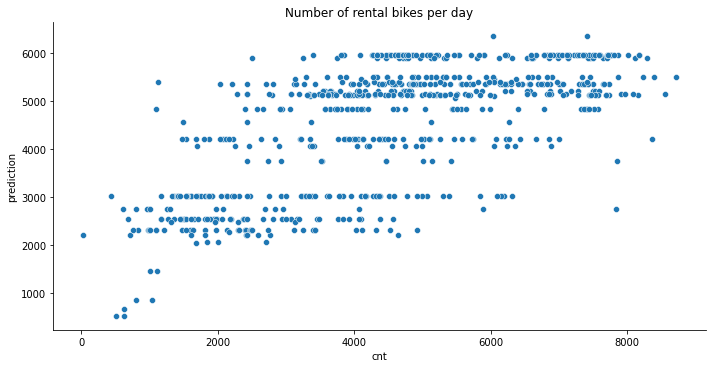

In [146]:
data_with_predictions = data_train.assign(
    **{lbl_prediction: pipeline.predict(X=data_train)}
)

sns.relplot(
    x=lbl_count_of_rental_bikes,
    y=lbl_prediction,
    aspect=2,
    data=data_with_predictions
)

plt.title("Number of rental bikes per day")
plt.show()

## Hyperparameter tuning

In [148]:
pipeline.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('binary features', 'passthrough',
                                    ['holiday', 'workingday']),
                                   ('categorical features',
                                    OneHotEncoder(sparse=False),
                                    ['season', 'weathersit'])])),
  ('randomforestregressor',
   RandomForestRegressor(n_estimators=5, random_state=0))],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('binary features', 'passthrough',
                                  ['holiday', 'workingday']),
                                 ('categorical features',
                                  OneHotEncoder(sparse=False),
                                  ['season', 'weathersit'])]),
 'randomforestregressor': RandomForestRegressor(n_estimators=5, random_state=0),
 'columntransformer__n_jobs': None,
 'columntransformer__remainder': 'drop',
 'columntransformer__spar

In [175]:
%%time

param_grid = [{"randomforestregressor__n_estimators": [5, 10, 50]}]
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring="r2")
grid_search.fit(X=data_train, y=y_train)
grid_search_results = pd.DataFrame(grid_search.cv_results_)

CPU times: user 975 ms, sys: 4.15 ms, total: 979 ms
Wall time: 1.3 s


In [176]:
grid_search_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestregressor__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018996,0.003495,0.006345,0.001190,5,{'randomforestregressor__n_estimators': 5},-2.569843,-6.645989,-2.538891,-2.293768,-2.089436,-3.227585,1.718127,3
1,0.022119,0.002872,0.006277,0.001466,10,{'randomforestregressor__n_estimators': 10},-2.598134,-6.467440,-2.476542,-2.254574,-2.059907,-3.171320,1.658392,2
2,0.101808,0.037099,0.014284,0.006530,50,{'randomforestregressor__n_estimators': 50},-2.579622,-6.353596,-2.202708,-2.222821,-2.017409,-3.075231,1.649254,1


In [162]:
grid_search.best_estimator_.score(X=data_train, y=y_train)

0.4517441548769938